In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the quiz dataset

df = pd.read_csv('household_power_consumption.txt', sep = ';', header = 0, low_memory = False, 
                   infer_datetime_format = True, parse_dates = {'datetime':[0,1]}, index_col = ['datetime'])

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:
#mark all missing values
df.replace('?', 'nan', inplace = True)

In [6]:
df.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,4187,533,2838,222,89,82,NaN
top,nan,0.000,nan,1.000,0.000,0.000,NaN
freq,25979,481561,25979,172785,1880175,1436830,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [7]:
#save updated dataset
df.to_csv('household_power_consumption.csv')

In [8]:
#let's load the new dataset and summarize
df = pd.read_csv('household_power_consumption.csv', header = 0, index_col = ['datetime'], 
                      infer_datetime_format = True, parse_dates = ['datetime'] )
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
df.fillna(value = df.mean(), inplace = True)

In [11]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

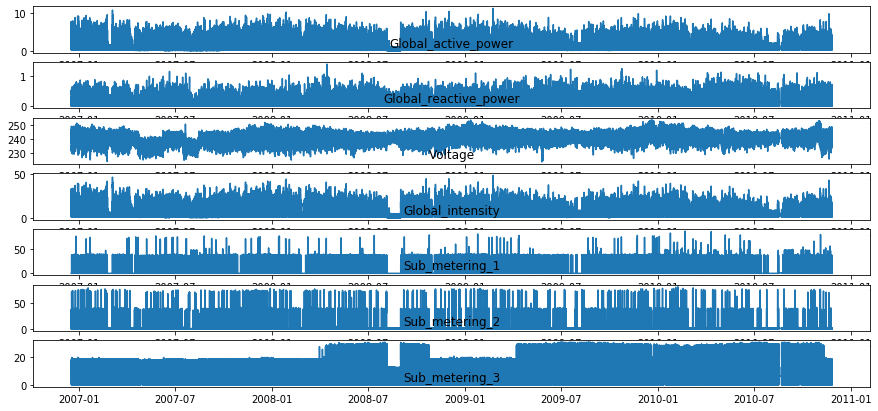

In [12]:
#line plots
plt.figure(figsize = (15, 7))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0)
plt.show()

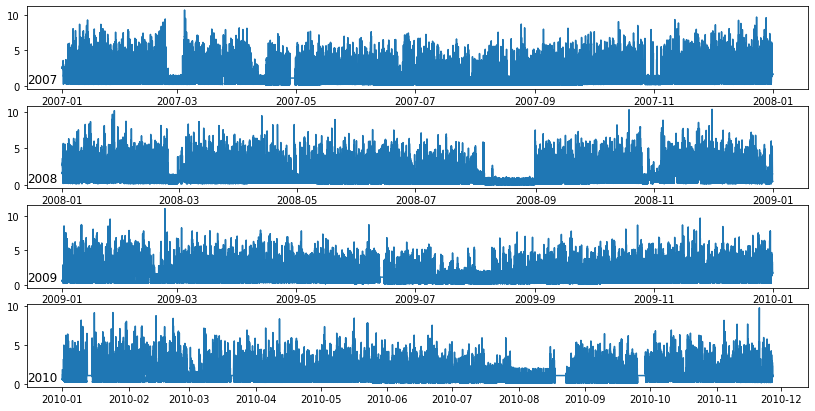

In [13]:
#yearly line plots
#plot global active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize = (14, 7))
for i in range(len(years)):
    #prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    #determine the year to plot
    year = years[i]
    #get all observations for the year from the dataset
    result = df[str(year)]
    #plot the active power for the year
    plt.plot(result['Global_active_power'])
    #add a title to the subplot
    plt.title(str(year), y = 0, loc = 'left')
plt.show()    

In [14]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2075259, freq=None)

In [15]:
##Resampling the data points(Downsampling)
df_daily = df.resample('D').mean()

In [16]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [17]:
df_daily.shape

(1442, 7)

Text(0, 0.5, 'Global_active_power')

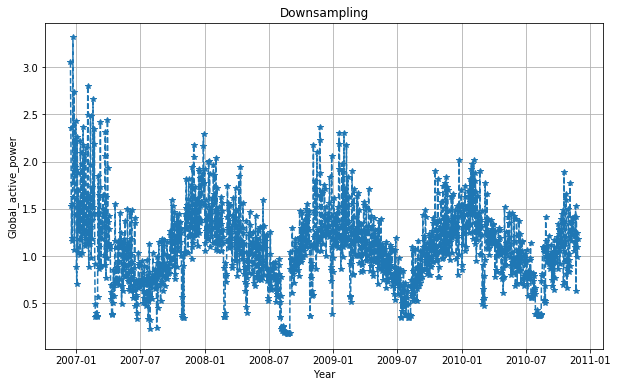

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power, '--', marker='*', )
plt.title('Downsampling')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')

In [19]:
from scipy.stats import pearsonr
stat, p = pearsonr(df_daily['Global_active_power'].values, df_daily['Global_reactive_power'].values)
print('stat = %.2f, p = %.2f' % (stat, p))

stat = 0.04, p = 0.17


In [20]:
from scipy.stats import pearsonr
stat, p = pearsonr(df_daily['Voltage'].values, df_daily['Global_intensity'].values)
print('stat = %.2f, p = %.2f' % (stat, p))

stat = 0.09, p = 0.00


### split the dataset into train and test, 
#### The shape of train dataset will be (x-365) where x is the total number of data points
#### The test dataset will be the last 365 days

In [21]:
train = df_daily[:1077]

In [22]:
train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [23]:
train.shape

(1077, 7)

In [24]:
test = df_daily[1077:]

In [25]:
test.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2009-11-27,0.958351,0.092397,241.858819,3.961111,0.000000,0.275000,8.054861
2009-11-28,1.290937,0.156401,241.596451,5.406111,2.221528,0.268056,9.965278
2009-11-29,1.146501,0.132678,243.308722,4.776667,0.745139,2.125694,5.436111
2009-11-30,1.211937,0.106515,243.764306,5.022361,0.750000,0.250694,8.360417
2009-12-01,1.219707,0.098524,242.633153,5.078333,0.000000,0.245833,7.514583


In [26]:
test.shape

(365, 7)

### Prepare train and test dataset by renaming datetime column and Global_active_power for univariate modelling

In [27]:
train_new = train.reset_index()
train_new = train_new.rename(columns={"datetime": "ds", "Global_active_power": "y"})
train_new = train_new[['ds', 'y']]
train_new.head()

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [28]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_new)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
test_new = test.reset_index()
test_new = test_new.rename(columns={"datetime": "ds", "Global_active_power": "y"})
test_new = test_new[['ds', 'y']]
test_new.head()

,ds,y
0,2009-11-27,0.958351
1,2009-11-28,1.290937
2,2009-11-29,1.146501
3,2009-11-30,1.211937
4,2009-12-01,1.219707


In [30]:
pred = m.make_future_dataframe(periods=365, freq='D') 
y_pred = m.predict(pred) 

In [31]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return round(np.mean(np.abs((actual - pred)/ actual)) * 100, 2)

In [32]:
mape(test_new['y'], y_pred['yhat'][1077:])

20.81

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_new['y'], y_pred['yhat'][1077:])
rmse = round(np.sqrt(mse), 2)

In [34]:
rmse

0.26

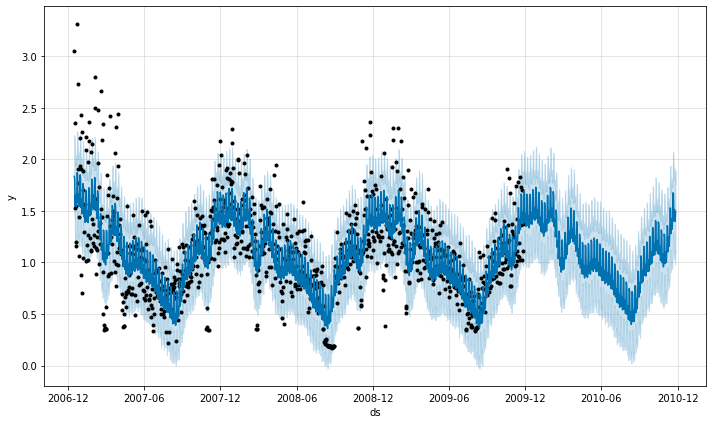

In [35]:
m.plot(y_pred)
plt.show()

In [36]:
multi = df_daily.reset_index().rename(columns={"datetime": "ds", "Global_active_power": "y", 'Global_reactive_power': 'add1', 'Voltage': 'add2', 'Global_intensity': 'add3', 'Sub_metering_1': 'add4', 'Sub_metering_2': 'add5', 'Sub_metering_3': 'add6'})

In [37]:
multi.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [38]:
multi.shape

(1442, 8)

In [39]:
train = multi[:1077]

In [40]:
test = multi[1077:]

In [41]:
train.shape

(1077, 8)

In [42]:
test.shape

(365, 8)

In [43]:
m2 = Prophet()
m2.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
pred2 = m2.make_future_dataframe(periods=365, freq='D') 
y_pred2 = m2.predict(pred2)

In [45]:
y_pred2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1.250476,1.430565,2.217523,1.250476,1.250476,0.583844,0.583844,0.583844,0.182636,0.182636,0.182636,0.401208,0.401208,0.401208,0.0,0.0,0.0,1.834320
1,2006-12-17,1.249466,1.398116,2.216030,1.249466,1.249466,0.564689,0.564689,0.564689,0.156387,0.156387,0.156387,0.408302,0.408302,0.408302,0.0,0.0,0.0,1.814155
2,2006-12-18,1.248456,1.144135,1.939123,1.248456,1.248456,0.301350,0.301350,0.301350,-0.114182,-0.114182,-0.114182,0.415533,0.415533,0.415533,0.0,0.0,0.0,1.549806
3,2006-12-19,1.247446,1.252008,2.059211,1.247446,1.247446,0.400221,0.400221,0.400221,-0.022418,-0.022418,-0.022418,0.422639,0.422639,0.422639,0.0,0.0,0.0,1.647668
4,2006-12-20,1.246436,1.275141,2.032319,1.246436,1.246436,0.410272,0.410272,0.410272,-0.019084,-0.019084,-0.019084,0.429356,0.429356,0.429356,0.0,0.0,0.0,1.656708


In [46]:
mape(test['y'], y_pred2['yhat'][1077:])

20.81

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['y'], y_pred2['yhat'][1077:])
print(round(np.sqrt(mse), 2))

0.26


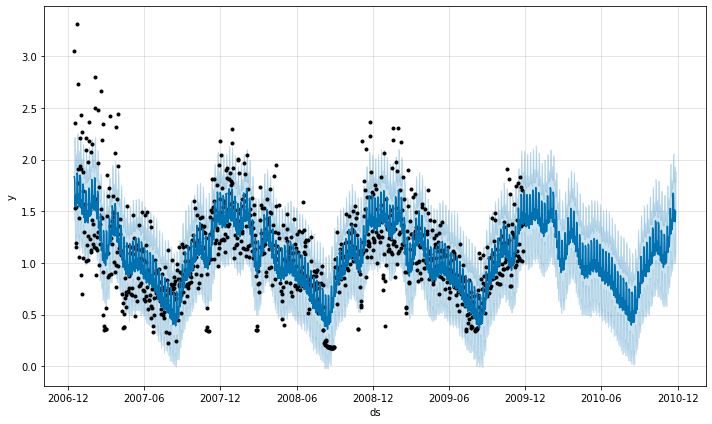

In [48]:
m2.plot(y_pred2)
plt.show()